In [53]:
import pandas as pd

In [54]:
pred_PLS_SM = pd.read_csv("./data/data/PLS_SM/tar_pred.csv")
pred_PLS_SM.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

pred_ICA = pd.read_csv("./data/data/jade/ica/tar_pred.csv")
pred_ICA["Sample Name"] = pred_ICA["target"]
pred_ICA.drop(columns=["target"], axis=1, inplace=True)

In [55]:
pred_ICA.columns

Index(['ID', 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O',
       'Sample Name'],
      dtype='object')

In [56]:
pred_ICA.head()

,ID,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
0,jsc1399_2013_09_11_151245_ccs,54.358193,0.915070,20.829506,13.384058,6.189111,8.389946,4.604968,1.085528,jsc1399
1,r65_2013_11_05_151321_ccs,58.864656,0.057594,12.543319,4.811779,6.537739,5.210740,2.962094,2.150490,r65
2,vzo106_2013_09_03_181628_ccs,66.275026,0.698434,12.804766,8.597515,-0.085340,1.824899,2.953498,1.731704,vzo106
3,201424_2013_11_06_155255_ccs,64.125299,0.886038,14.750741,4.977112,4.747535,2.304864,2.753124,2.874335,201424
4,jsc1424_2013_09_16_145015_ccs,57.353441,1.176242,13.347413,12.256024,3.557050,5.910352,1.648106,0.378352,jsc1424


In [57]:
ids_to_keep = pred_ICA["ID"]
filtered_pred_PLS_SM = pred_PLS_SM[pred_PLS_SM['ID'].isin(ids_to_keep)]

In [58]:
filtered_pred_PLS_SM.set_index("ID", inplace=True)
pred_ICA.set_index("ID", inplace=True)

In [59]:
aligned_pred_PLS_SM, aligned_pred_ICA = filtered_pred_PLS_SM.align(pred_ICA, join="inner", axis=0)

In [60]:
aligned_pred_PLS_SM

,Sample Name,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O
ID,,,,,,,,,
jsc1426_2013_09_16_151528_ccs,jsc1426,45.660536,0.612356,9.090196,18.606471,-1.715566,0.846718,0.499320,4.734419
bk2_2013_08_06_184259_ccs,bk2,54.908321,0.783517,15.466058,6.361487,2.765290,3.511354,3.974571,3.635766
jsc1379_2013_09_10_142041_ccs,jsc1379,51.937561,0.716445,18.356435,8.951166,3.931524,3.273924,3.749923,1.789298
gbw07108_2013_08_07_145651_ccs,gbw07108,45.085962,0.558653,10.556028,6.351809,4.425639,6.924741,0.659976,2.085899
jsc1456_2013_09_18_160559_ccs,jsc1456,48.086602,2.152847,18.237683,10.244407,5.122110,5.585319,4.503491,2.023662
...,...,...,...,...,...,...,...,...,...
gbw07105_2013_08_07_142727_ccs,gbw07105,49.447254,1.477877,14.770864,11.097642,7.707842,4.477528,3.717268,2.187450
sarm51_2013_08_29_145612_ccs,sarm51,48.873952,0.798746,12.355091,13.774526,1.449006,2.159050,0.485271,1.879807
s4_2013_11_05_155948_ccs,s4,58.671729,0.987831,19.269466,7.148700,1.324785,0.495911,0.681625,3.849603


In [61]:
from lib.reproduction import weighted_sum_oxide_percentages, major_oxides

merged_df = pd.merge(aligned_pred_ICA, aligned_pred_PLS_SM, on='Sample Name', suffixes=('_ICA', '_PLS_SM'))
moc_predictions = pd.DataFrame()

for oxide in major_oxides:
    w_ica = weighted_sum_oxide_percentages[oxide]['ICA'] / 100
    w_pls_sm = weighted_sum_oxide_percentages[oxide]['PLS1-SM'] / 100
    moc_predictions[oxide] = merged_df[oxide + '_ICA'] * w_ica + merged_df[oxide + '_PLS_SM'] * w_pls_sm

moc_predictions['Sample Name'] = merged_df['Sample Name']
moc_predictions['ID'] = aligned_pred_ICA.index

In [62]:
moc_predictions

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name,ID
0,52.546644,0.003484,9.097508,17.917768,-1.644520,2.480214,2.584670,2.497148,jsc1426,jsc1426_2013_09_16_151528_ccs
1,58.840350,1.438582,17.909983,6.121762,3.000838,3.735413,5.872624,5.347038,bk2,bk2_2013_08_06_184259_ccs
2,53.346258,0.885167,18.501836,9.262828,4.637115,5.024650,4.617953,1.001709,jsc1379,jsc1379_2013_09_10_142041_ccs
3,31.599594,0.202631,9.866677,6.418935,7.002024,17.590826,2.347591,0.388986,gbw07108,gbw07108_2013_08_07_145651_ccs
4,48.292805,2.180985,19.274533,10.397011,5.358443,5.356664,3.169835,1.435419,jsc1456,jsc1456_2013_09_18_160559_ccs
...,...,...,...,...,...,...,...,...,...,...
66,45.009691,1.776549,16.163372,11.693684,8.689882,5.936699,3.664725,1.307377,gbw07105,gbw07105_2013_08_07_142727_ccs
67,52.181245,0.384429,12.323830,12.898915,-3.542706,5.680873,3.165664,0.336587,sarm51,sarm51_2013_08_29_145612_ccs
68,61.096949,1.186453,18.757195,7.504857,2.948126,0.178816,1.715842,3.752873,s4,s4_2013_11_05_155948_ccs
69,77.004721,0.307346,14.099260,5.376656,0.303799,-0.090995,1.478668,3.705949,gl7mt,gl7mt_2013_10_23_144551_ccs


In [63]:
from lib.data_handling import CompositionData

cd = CompositionData("data/data/calib/ccam_calibration_compositions.csv")

In [64]:
def merge_with_actual_data(moc_predictions):
    merged_data = pd.DataFrame()

    for index, row in moc_predictions.iterrows():
        actual_data = cd.get_composition_for_sample(row['Sample Name'])

        if not actual_data.empty:
            for oxide in major_oxides:
                merged_data.at[index, oxide + '_pred'] = row[oxide]
                merged_data.at[index, oxide + '_actual'] = actual_data[oxide].values[0]
            merged_data.at[index, 'Sample Name'] = row['Sample Name']

    return merged_data

In [65]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(merged_data):
    rmse_values = {}
    for oxide in major_oxides:
        y_actual = merged_data[oxide + '_actual']
        y_pred = merged_data[oxide + '_pred']
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        rmse_values[oxide] = rmse
    return rmse_values

# Usage example
merged_moc_actual_df = merge_with_actual_data(moc_predictions)
moc_rmse_values = calculate_rmse(merged_moc_actual_df)

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

In [66]:
SiO2_eval_df = pd.merge(merged_df[["SiO2_ICA", "SiO2_PLS_SM", "Sample Name"]], 
                    merged_moc_actual_df[["SiO2_actual", "SiO2_pred", "Sample Name"]], 
                    on="Sample Name")

SiO2_eval_df = SiO2_eval_df[0:5]
SiO2_eval_df

,SiO2_ICA,SiO2_PLS_SM,Sample Name,SiO2_actual,SiO2_pred
0,59.432752,45.660536,jsc1426,19.3,52.546644
1,62.772379,54.908321,bk2,58.83,58.840350
2,54.754955,51.937561,jsc1379,48.93,53.346258
3,18.113227,45.085962,gbw07108,15.6,31.599594
4,48.499007,48.086602,jsc1456,49.31,48.292805


/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

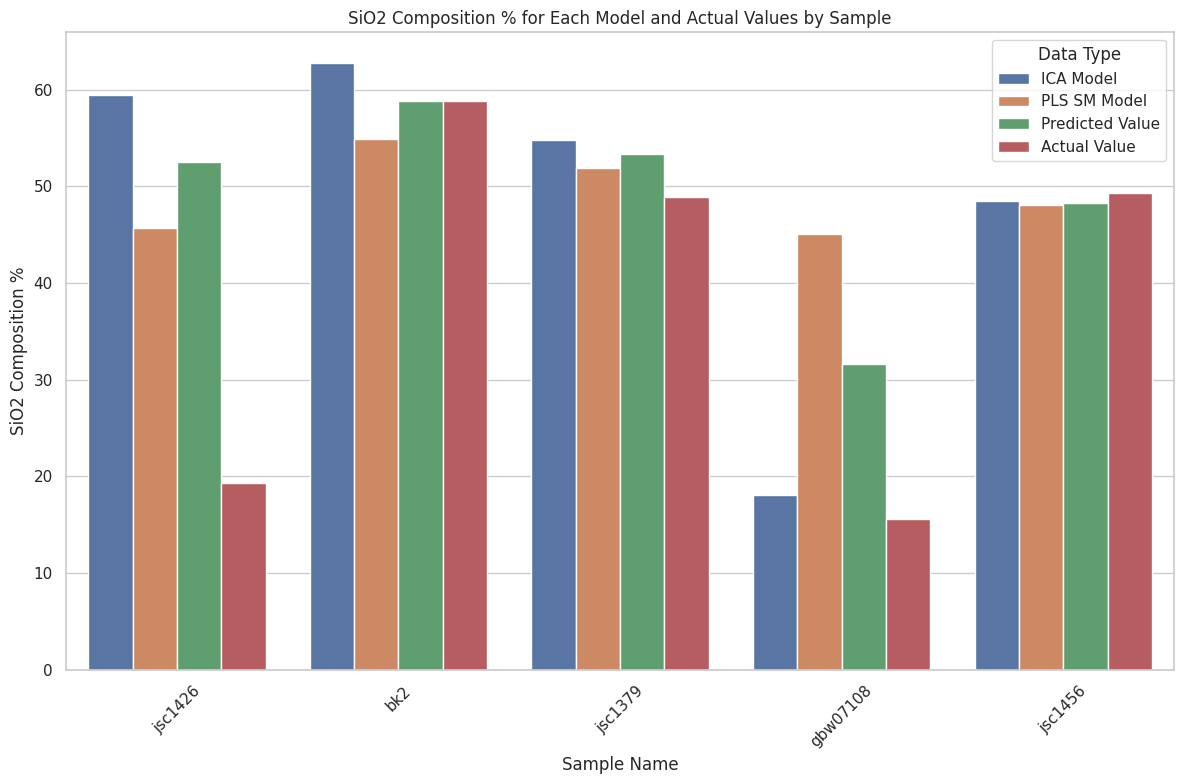

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a figure for the plot
plt.figure(figsize=(12, 8))

# Creating aliases for the value_vars
aliases = {
    'SiO2_ICA': 'ICA Model',
    'SiO2_PLS_SM': 'PLS SM Model',
    'SiO2_pred': 'Predicted Value',
    'SiO2_actual': 'Actual Value'
}

# Merging the data for actual and predicted values for the plot
melted_data = pd.melt(SiO2_eval_df, id_vars='Sample Name', value_vars=list(aliases.keys()))

# Renaming the columns based on aliases
melted_data = melted_data.rename(columns={'variable': 'Model/Value', 'value': 'SiO2 Composition %'})
melted_data['Model/Value'] = melted_data['Model/Value'].map(aliases)

# Creating the grouped bar chart
sns.barplot(x='Sample Name', y='SiO2 Composition %', hue='Model/Value', data=melted_data)

# Adding labels and title
plt.xlabel('Sample Name')
plt.ylabel('SiO2 Composition %')
plt.title('SiO2 Composition % for Each Model and Actual Values by Sample')
plt.xticks(rotation=45)
plt.legend(title='Data Type')

plt.gca().invert_yaxis()

# Displaying the plot
plt.tight_layout()
plt.show()

In [68]:
merged_moc_actual_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
0,52.546644,19.3,0.003484,0.08,9.097508,1.49,17.917768,65.85,-1.644520,0.77,2.480214,0.77,2.584670,0.45,2.497148,0.16,jsc1426
1,58.840350,58.83,1.438582,1.94,17.909983,14.77,6.121762,7.90,3.000838,2.82,3.735413,4.64,5.872624,3.35,5.347038,3.99,bk2
2,53.346258,48.93,0.885167,0.57,18.501836,22.66,9.262828,7.67,4.637115,4.34,5.024650,9.80,4.617953,3.13,1.001709,0.45,jsc1379
3,31.599594,15.6,0.202631,0.33,9.866677,5.03,6.418935,2.27,7.002024,5.19,17.590826,35.67,2.347591,0.08,0.388986,0.78,gbw07108
4,48.292805,49.31,2.180985,2.72,19.274533,16.46,10.397011,10.93,5.358443,3.93,5.356664,6.75,3.169835,4.58,1.435419,1.82,jsc1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,45.009691,44.64,1.776549,2.37,16.163372,13.83,11.693684,12.06,8.689882,7.77,5.936699,8.81,3.664725,3.38,1.307377,2.32,gbw07105
67,52.181245,33.81,0.384429,0.82,12.323830,11.87,12.898915,16.52,-3.542706,0.92,5.680873,0.86,3.165664,0.07,0.336587,0.33,sarm51
68,61.096949,67.4,1.186453,0.9,18.757195,16.30,7.504857,5.14,2.948126,1.81,0.178816,0.21,1.715842,0.81,3.752873,3.4,s4
69,77.004721,77.54,0.307346,0.33,14.099260,11.17,5.376656,2.54,0.303799,1.08,-0.090995,0.07,1.478668,2.33,3.705949,2.39,gl7mt


In [69]:
moc_rmse_values

{'SiO2': 9.041137258232911,
 'TiO2': 0.5120668128437562,
 'Al2O3': 3.092268526265209,
 'FeOT': 7.659967387220975,
 'MgO': 1.6651179823981204,
 'CaO': 4.86992665412937,
 'Na2O': 1.0983568061157658,
 'K2O': 1.1554264278929454}

In [70]:
ICA_actual_merged_df = merge_with_actual_data(aligned_pred_ICA)
ICA_rmses = calculate_rmse(ICA_actual_merged_df)

PLS_SM_actual_merged_df = merge_with_actual_data(aligned_pred_PLS_SM)
PLS_SM_rmses = calculate_rmse(PLS_SM_actual_merged_df)

ICA_rmses

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

{'SiO2': 10.733351503419852,
 'TiO2': 0.630111277136453,
 'Al2O3': 5.548546427605581,
 'FeOT': 8.299246038856959,
 'MgO': 2.9022778097822357,
 'CaO': 3.521759082875863,
 'Na2O': 1.720635345835822,
 'K2O': 1.367247198773664}

In [71]:
PLS_SM_actual_merged_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
jsc1426_2013_09_16_151528_ccs,45.660536,19.3,0.612356,0.08,9.090196,1.49,18.606471,65.85,-1.715566,0.77,0.846718,0.77,0.499320,0.45,4.734419,0.16,jsc1426
bk2_2013_08_06_184259_ccs,54.908321,58.83,0.783517,1.94,15.466058,14.77,6.361487,7.90,2.765290,2.82,3.511354,4.64,3.974571,3.35,3.635766,3.99,bk2
jsc1379_2013_09_10_142041_ccs,51.937561,48.93,0.716445,0.57,18.356435,22.66,8.951166,7.67,3.931524,4.34,3.273924,9.80,3.749923,3.13,1.789298,0.45,jsc1379
gbw07108_2013_08_07_145651_ccs,45.085962,15.6,0.558653,0.33,10.556028,5.03,6.351809,2.27,4.425639,5.19,6.924741,35.67,0.659976,0.08,2.085899,0.78,gbw07108
jsc1456_2013_09_18_160559_ccs,48.086602,49.31,2.152847,2.72,18.237683,16.46,10.244407,10.93,5.122110,3.93,5.585319,6.75,4.503491,4.58,2.023662,1.82,jsc1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gbw07105_2013_08_07_142727_ccs,49.447254,44.64,1.477877,2.37,14.770864,13.83,11.097642,12.06,7.707842,7.77,4.477528,8.81,3.717268,3.38,2.187450,2.32,gbw07105
sarm51_2013_08_29_145612_ccs,48.873952,33.81,0.798746,0.82,12.355091,11.87,13.774526,16.52,1.449006,0.92,2.159050,0.86,0.485271,0.07,1.879807,0.33,sarm51
s4_2013_11_05_155948_ccs,58.671729,67.4,0.987831,0.9,19.269466,16.30,7.148700,5.14,1.324785,1.81,0.495911,0.21,0.681625,0.81,3.849603,3.4,s4
gl7mt_2013_10_23_144551_ccs,78.087196,77.54,0.647306,0.33,12.483567,11.17,6.493824,2.54,0.197956,1.08,-0.392221,0.07,2.272038,2.33,2.147934,2.39,gl7mt


In [72]:
PLS_SM_rmses

{'SiO2': 9.865267950377834,
 'TiO2': 0.4997491112482198,
 'Al2O3': 2.8413462832462812,
 'FeOT': 7.5824649237093595,
 'MgO': 1.7211104269513653,
 'CaO': 7.206287601022982,
 'Na2O': 0.6689883620653339,
 'K2O': 1.1723804678435195}

In [73]:
RMSEs_df = pd.DataFrame([ICA_rmses, PLS_SM_rmses, moc_rmse_values], index=["ICA", "PLS_SM", "MOC (ours)"])

In [74]:
RMSEs_df.T

,ICA,PLS_SM,MOC (ours)
SiO2,10.733352,9.865268,9.041137
TiO2,0.630111,0.499749,0.512067
Al2O3,5.548546,2.841346,3.092269
FeOT,8.299246,7.582465,7.659967
MgO,2.902278,1.721110,1.665118
CaO,3.521759,7.206288,4.869927
Na2O,1.720635,0.668988,1.098357
K2O,1.367247,1.172380,1.155426


In [75]:
MOC_model_rmses = {
    'SiO2': 5.83,
    'TiO2': 1.10,
    'Al2O3': 3.18,
    'FeOT': 2.90,
    'MgO': 2.30,
    'CaO': 1.14,
    'Na2O': 1.34,
    'K2O': 1.49
 }

In [76]:
R_df = RMSEs_df.T
R_df['MOC (actual)'] = MOC_model_rmses.values()

In [77]:
R_df
# R_df.to_csv("eval.csv")

,ICA,PLS_SM,MOC (ours),MOC (actual)
SiO2,10.733352,9.865268,9.041137,5.83
TiO2,0.630111,0.499749,0.512067,1.10
Al2O3,5.548546,2.841346,3.092269,3.18
FeOT,8.299246,7.582465,7.659967,2.90
MgO,2.902278,1.721110,1.665118,2.30
CaO,3.521759,7.206288,4.869927,1.14
Na2O,1.720635,0.668988,1.098357,1.34
K2O,1.367247,1.172380,1.155426,1.49


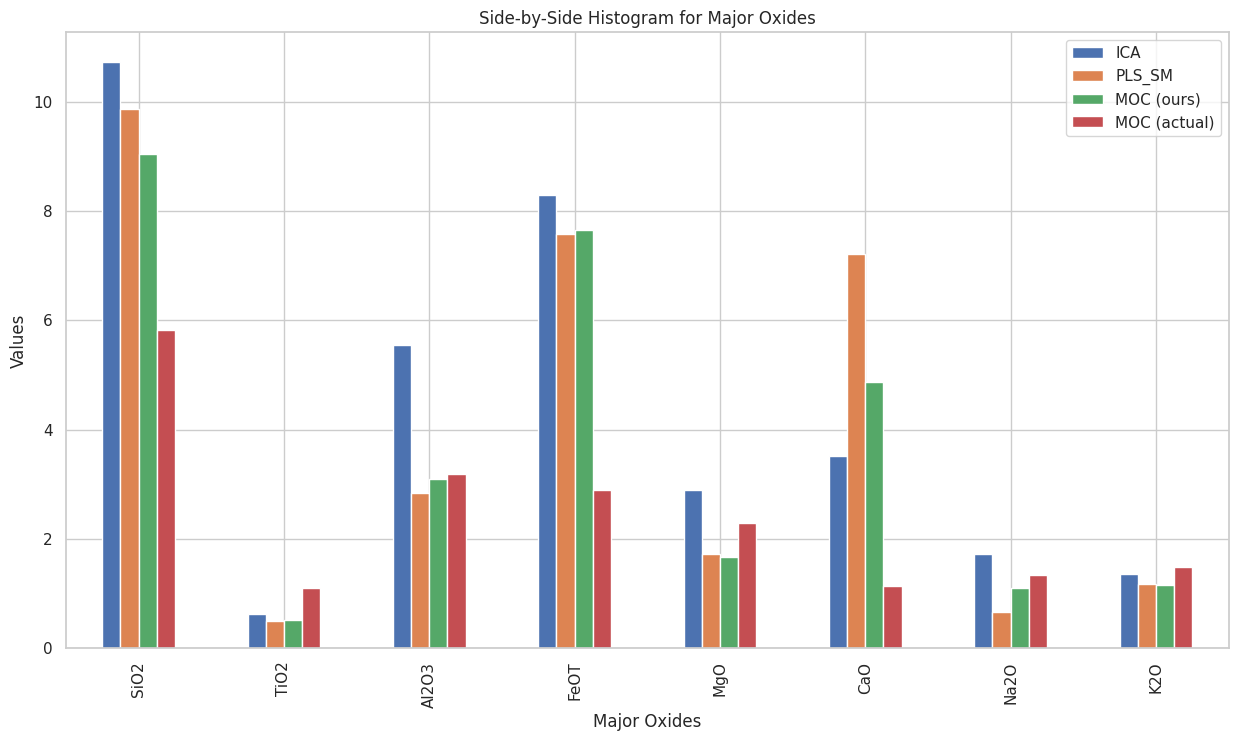

In [78]:
import matplotlib.pyplot as plt

# Setting the first column as the index
# R_df.set_index('Unnamed: 0', inplace=True)

# Creating the plot
ax = R_df.plot(kind='bar', figsize=(15, 8))

# Adding labels and title
ax.set_ylabel('Values')
ax.set_xlabel('Major Oxides')
ax.set_title('Side-by-Side Histogram for Major Oxides')

# Display the plot
plt.show()
